In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#load data
data = pd.read_csv(r"C:\Users\Administrator\Desktop\Data Analytics\Intern Career\Youtube Streamer\youtubers_df.csv")
data.rename(columns={'Suscribers': 'Subscribers'}, inplace= True)
data.head(7)

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
6,7,LikeNastyaofficial,Juguetes,107500000.0,Unknown,2600000.0,28000.0,0.0,http://youtube.com/channel/UCJplp5SjeGSdVdwsfb...


In [3]:
#Check for number of rows and columns
data.shape
#name of columns
data.columns
#rename column subscriber from suscribers
# data.rename(columns={'Suscribers': 'Subscribers'}, inplace= True)


Index(['Rank', 'Username', 'Categories', 'Subscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

In [4]:
#data cleaning
#check for null values = categories = 306
data.isnull().sum()
#fill the null values
data['Categories'].fillna('Unknown', inplace = True);

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8876\117390913.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Categories'].fillna('Unknown', inplace = True);


In [5]:
#check for duplicates
data.duplicated().sum()
#check for unknown values
data[data['Country']=='Unknown'].value_counts().sum()
data[data['Visits']=='Unknown'].value_counts().sum()

np.int64(0)

<Axes: >

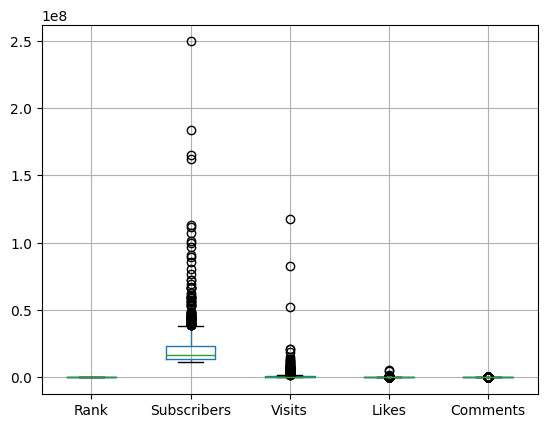

In [41]:
#chack for outliers
# data.boxplot(by=['Subscribers', 'Visits', 'Likes', 'Comments'])
data.boxplot()

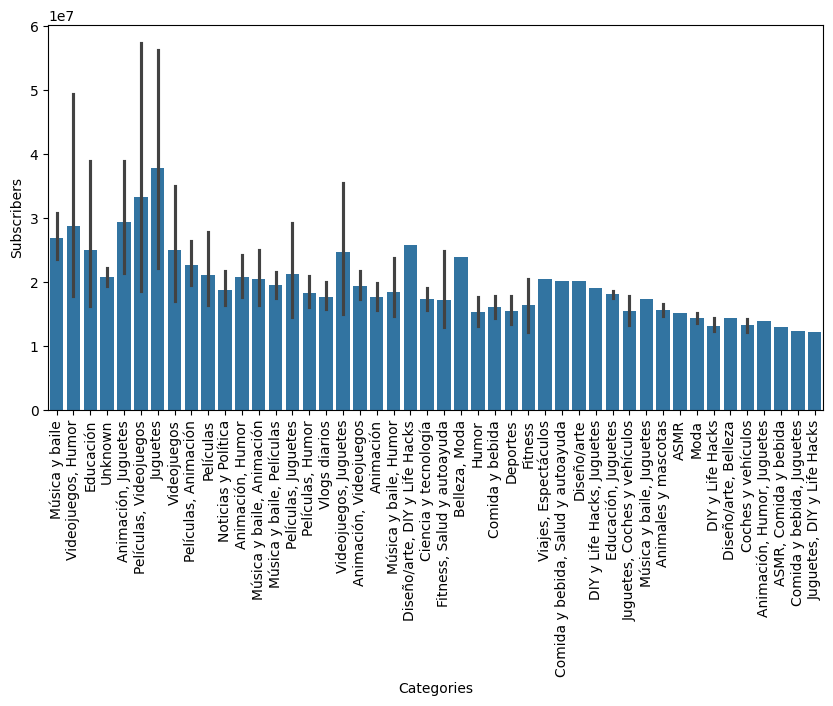

In [47]:
#top youtube channels by subscribers
top_lead  = data.sort_values(by = 'Subscribers', ascending = False).head(5)
top_lead 
#top youtube channels with most views
top_lead_visits = data.sort_values(by = 'Visits', ascending = False).head(5)
top_lead_visits['Username']
#top youtube channels with most likes
top_lead_likes = data.sort_values(by = 'Likes', ascending = False).head(5)
top_lead_likes['Username']
#identify trend between the subscribers and categories include only the top7
data['Categories'].value_counts().head(7)
#plot the trend
plt.figure(figsize=(10,5))
sns.barplot(x = 'Categories', y = 'Subscribers', data = data)
plt.xticks(rotation = 90)
plt.show()

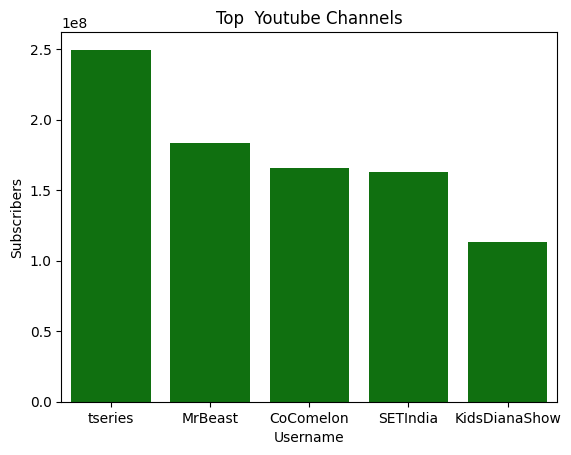

In [38]:
sns.barplot(x = 'Username', y = 'Subscribers',data = top_lead, color='green')
plt.title('Top  Youtube Channels')
plt.xlabel('Username')
plt.ylabel('Subscribers')
plt.show()


In [8]:
#popular categories
popular_categories = data[data['Categories'] != 'Unknown']
popular_categories.Categories.value_counts().head(7)

Categories
Música y baile               160
Películas, Animación          61
Música y baile, Películas     41
Vlogs diarios                 37
Noticias y Política           36
Películas, Humor              34
Animación, Videojuegos        34
Name: count, dtype: int64

<Axes: xlabel='Categories'>

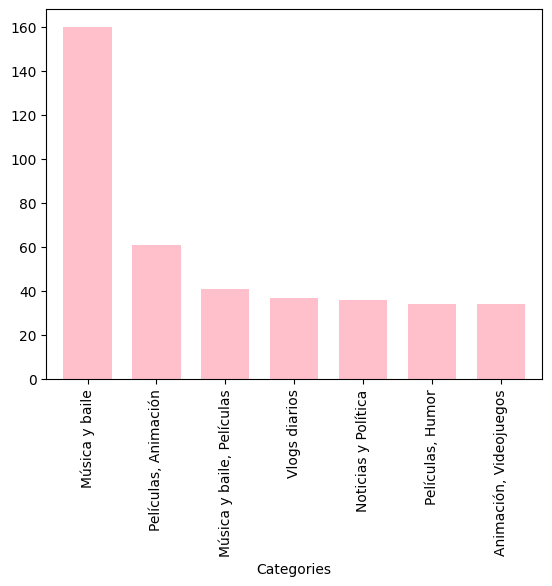

In [9]:
popular_categories.Categories.value_counts().head(7).plot(kind='bar', color='pink', width=0.7) 

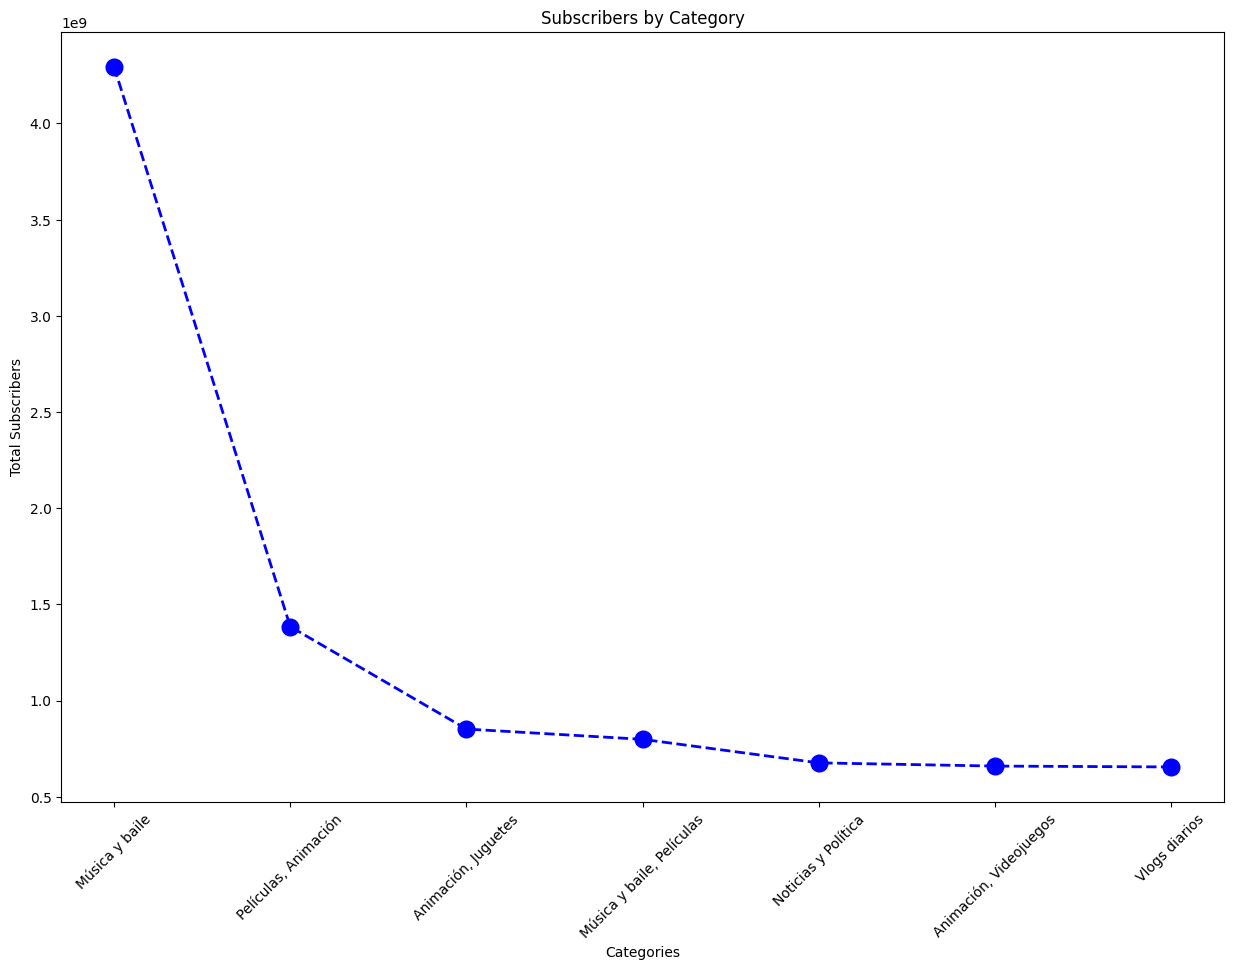

In [52]:
# Calculate the number of subscribers for each category, excluding "Unknown"
category_subscribers = popular_categories.groupby('Categories')['Subscribers'].sum().sort_values(ascending=False).head(7)
plt.figure(figsize=(15, 10))
plt.plot(category_subscribers.index, category_subscribers.values, color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.xlabel('Categories')
plt.ylabel('Total Subscribers')
plt.title('Subscribers by Category')
plt.xticks(rotation=45)
plt.show()

#the most popular category is musica y baile

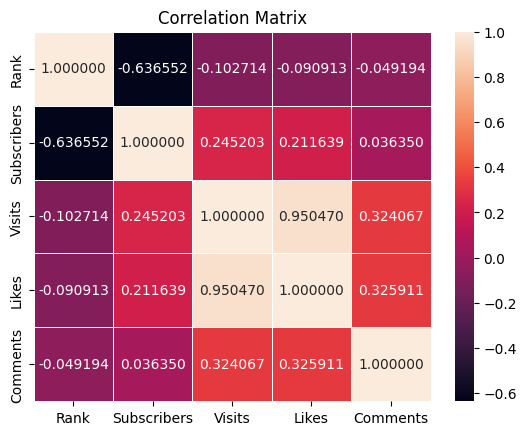

             Subscribers     Likes  Comments
Subscribers     1.000000  0.211639  0.036350
Likes           0.211639  1.000000  0.325911
Comments        0.036350  0.325911  1.000000


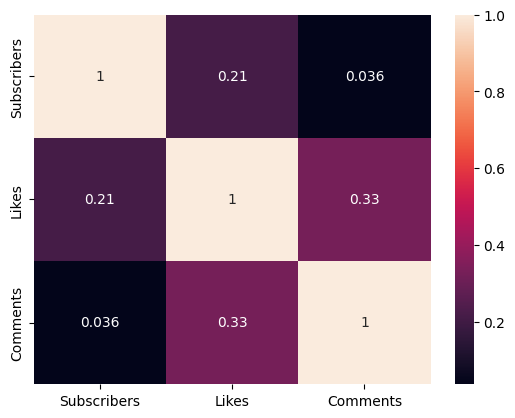

In [44]:
# correlation btwn number columns
numeric_df = data.select_dtypes(include=['float64', 'int64'])
numeric_df.head()
numeric_df.corr()
#visualize correlation among all var
sns.heatmap(numeric_df.corr(), annot= True, fmt="2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
#correlation between subscribers, likes and comments
crltn = data[['Subscribers', 'Likes', 'Comments']].corr()
print(crltn)
sns.heatmap(crltn, annot=True)
plt.show()
#there is apositive correlation, below 1, between subscribers, likes and comments but the relationship is not strong
#Increase in subscribers leads to increase in likes and comments but not rank,however they do not enusre groth of the other


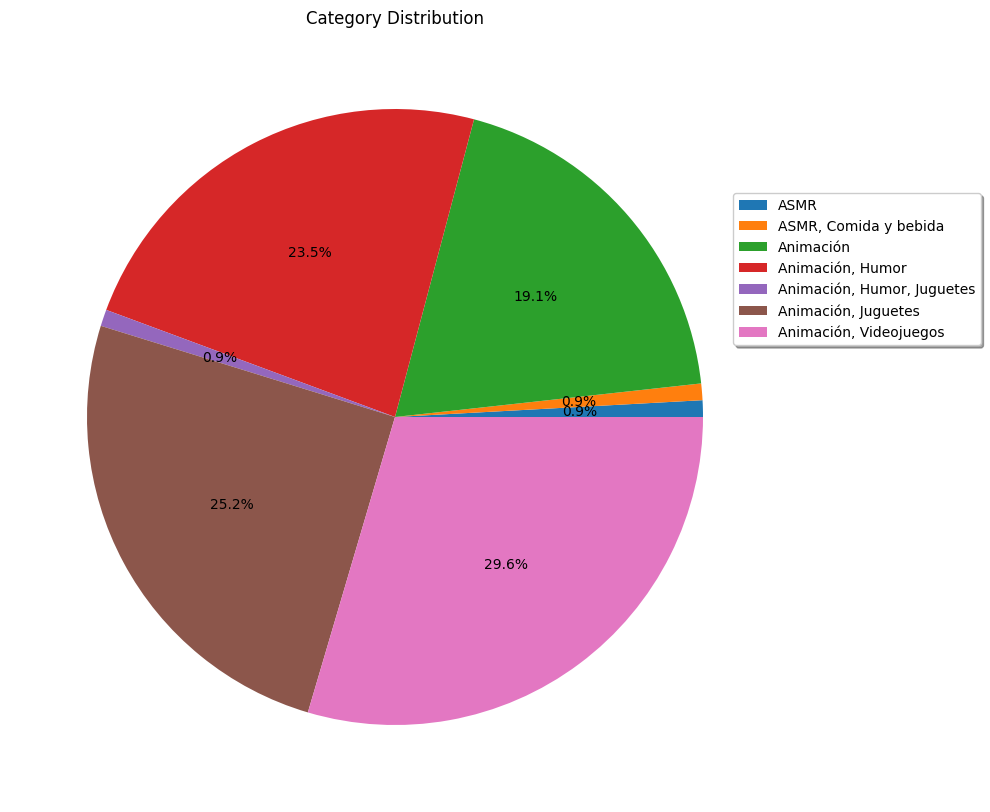

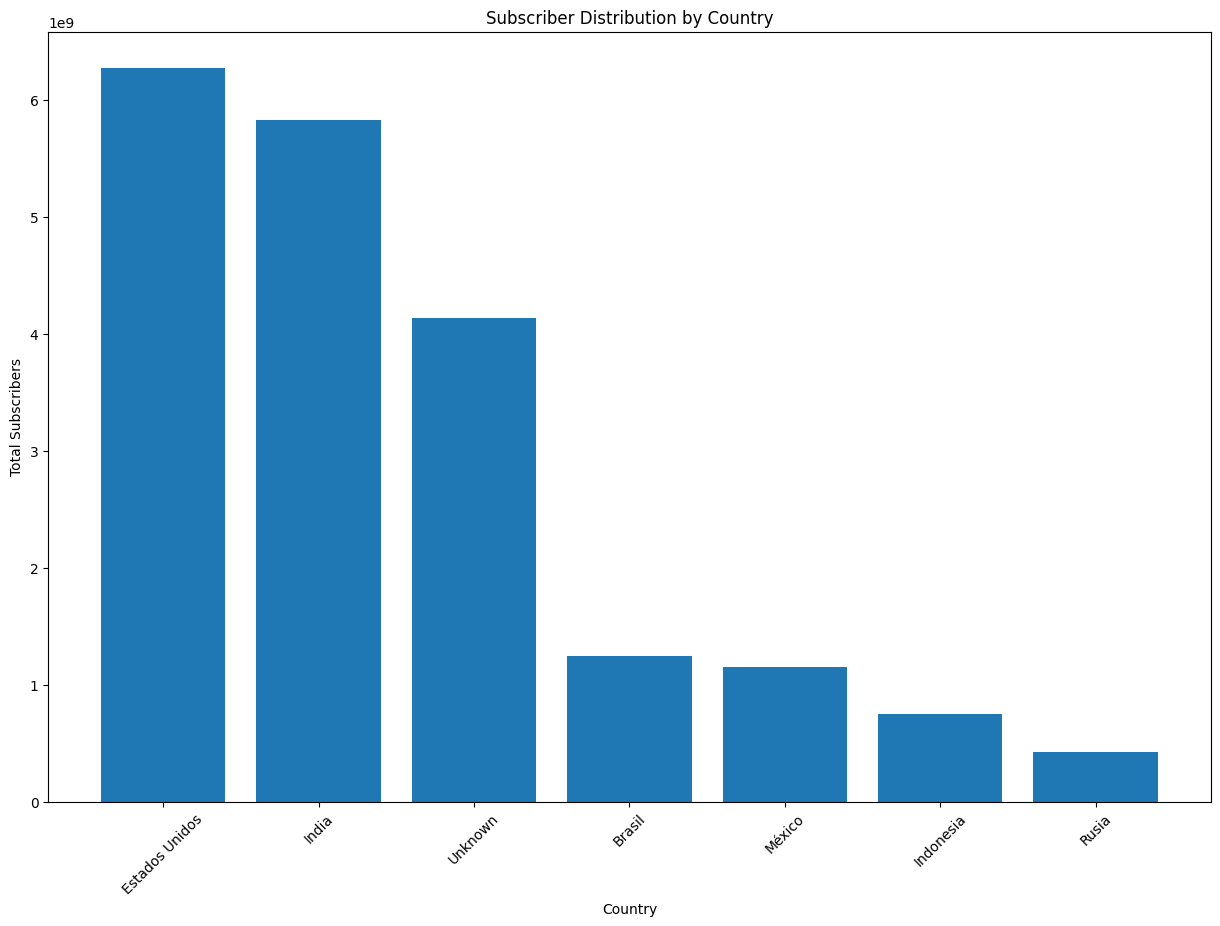

In [54]:
#distribution of categories by country.
# country_categories = data.groupby('Country')['Categories'].count().head(7)
country_categories = data.groupby('Categories')['Country'].count().head(7)
plt.figure(figsize=(15, 10))
plt.pie(country_categories, autopct='%1.1f%%')
plt.title('Category Distribution')
plt.legend(country_categories.index, loc='upper center', bbox_to_anchor=(1.1, 0.8), shadow=True)
plt.show()
#distribution of susbcribers by country
country_subscribers = data.groupby('Country')['Subscribers'].sum().sort_values(ascending=False).head(7)
plt.figure(figsize=(15, 10))
plt.bar(country_subscribers.index, country_subscribers.values)
plt.xlabel('Country')
plt.ylabel('Total Subscribers')
plt.title('Subscriber Distribution by Country')
plt.xticks(rotation=45)
plt.show()
#estados unidos has the highest number of subscribers while 
#animacion, videojuegos is the most popular category among the countries with a 29.6%coverage


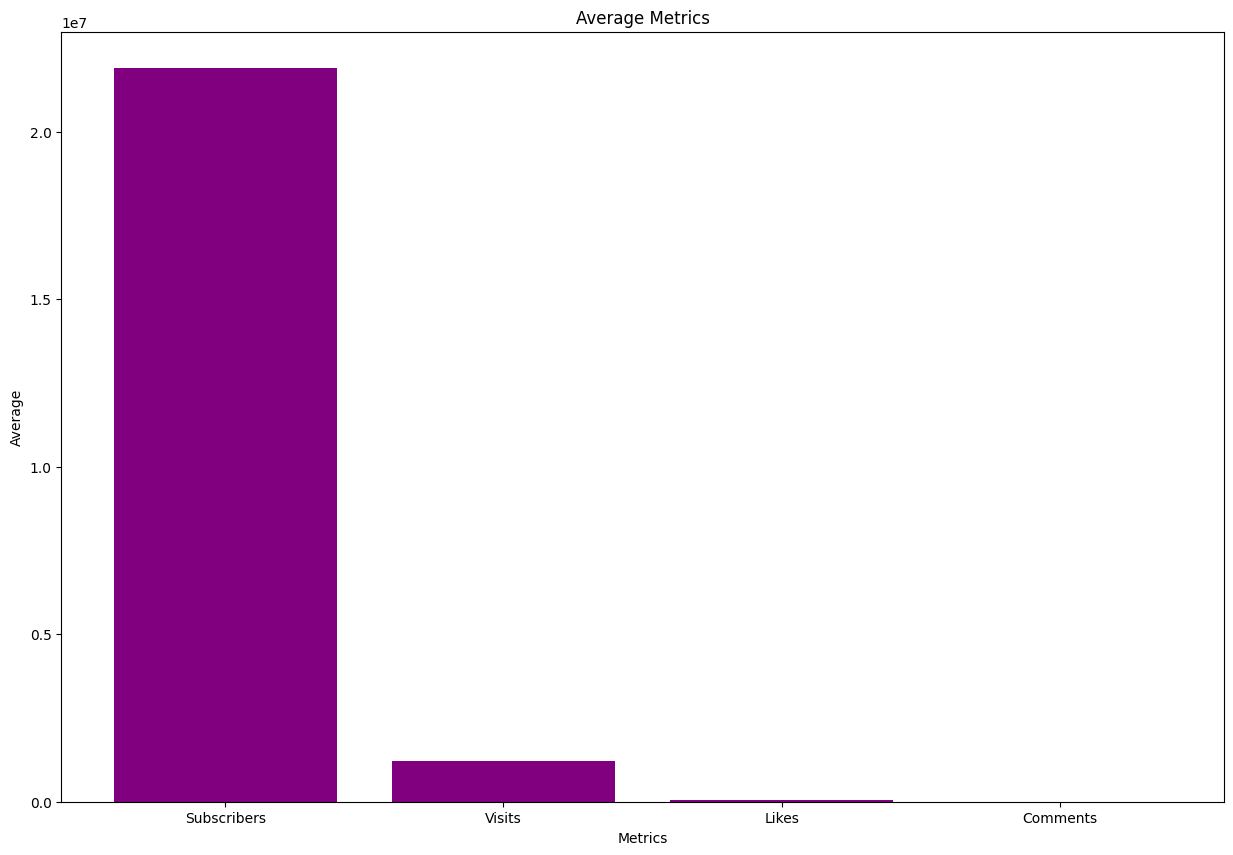

In [28]:
#calculate the average of each metric
avg_metrics = data[['Subscribers', 'Visits', 'Likes', 'Comments']].mean()
avg_metrics.head(7)
#visualize the average metrics to identify anomalies
plt.figure(figsize=(15, 10))
plt.bar(avg_metrics.index, avg_metrics.values, color='purple')
plt.xlabel('Metrics')
plt.ylabel('Average')
plt.title('Average Metrics')
plt.show()

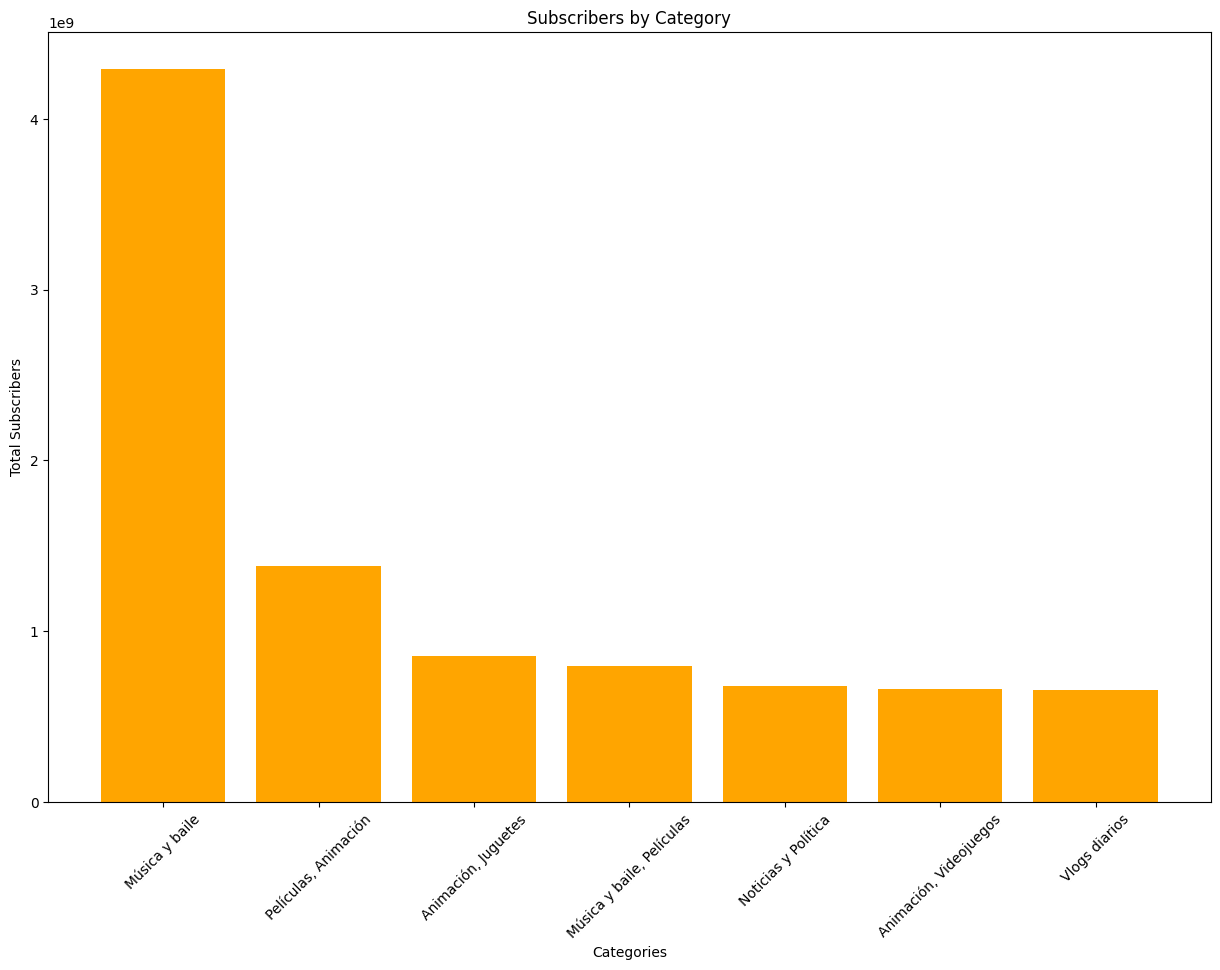

In [55]:
#categories with highest number of subscribers
category_subscribers = popular_categories.groupby('Categories')['Subscribers'].sum().sort_values(ascending=False).head(7)
plt.figure(figsize=(15, 10))
plt.bar(category_subscribers.index, category_subscribers.values, color='orange')
plt.xlabel('Categories')
plt.ylabel('Total Subscribers')
plt.title('Subscribers by Category')
plt.xticks(rotation=45)
plt.show()
#musica y baile has the highest number of subscribers 

In [62]:
#Streamers with above-average performance in all metrics
above_avg_streamers = data[
    (data['Subscribers'] > avg_metrics['Subscribers']) &
    (data['Visits'] > avg_metrics['Visits']) &
    (data['Likes'] > avg_metrics['Likes']) &
    (data['Comments'] > avg_metrics['Comments'])
]
print("Categories with above-average performance in all metrics")
print(above_avg_streamers['Categories'].head(7))
#the category with a exceptional perfomance metric is Videojuegos,Humor
print("Streamers with above-average performance:")
print(above_avg_streamers['Username'].head(7))
#the top performing streamer is MrBeast followed by PewBiePie 

Categories with above-average performance in all metrics
1         Videojuegos, Humor
5     Películas, Videojuegos
26               Videojuegos
34            Música y baile
39      Películas, Animación
43          Animación, Humor
58      Películas, Animación
Name: Categories, dtype: object
Streamers with above-average performance:
1         MrBeast
5       PewDiePie
26    dudeperfect
34    TaylorSwift
39    JuegaGerman
43       A4a4a4a4
58      Mikecrack
Name: Username, dtype: object


C:\Users\Administrator\AppData\Local\Temp\ipykernel_8876\74139458.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  above_avg_streamers['Marketing'] = 'Above Average'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8876\74139458.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  below_avg_streamers['Marketing'] = 'Below Average'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8876\74139458.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.

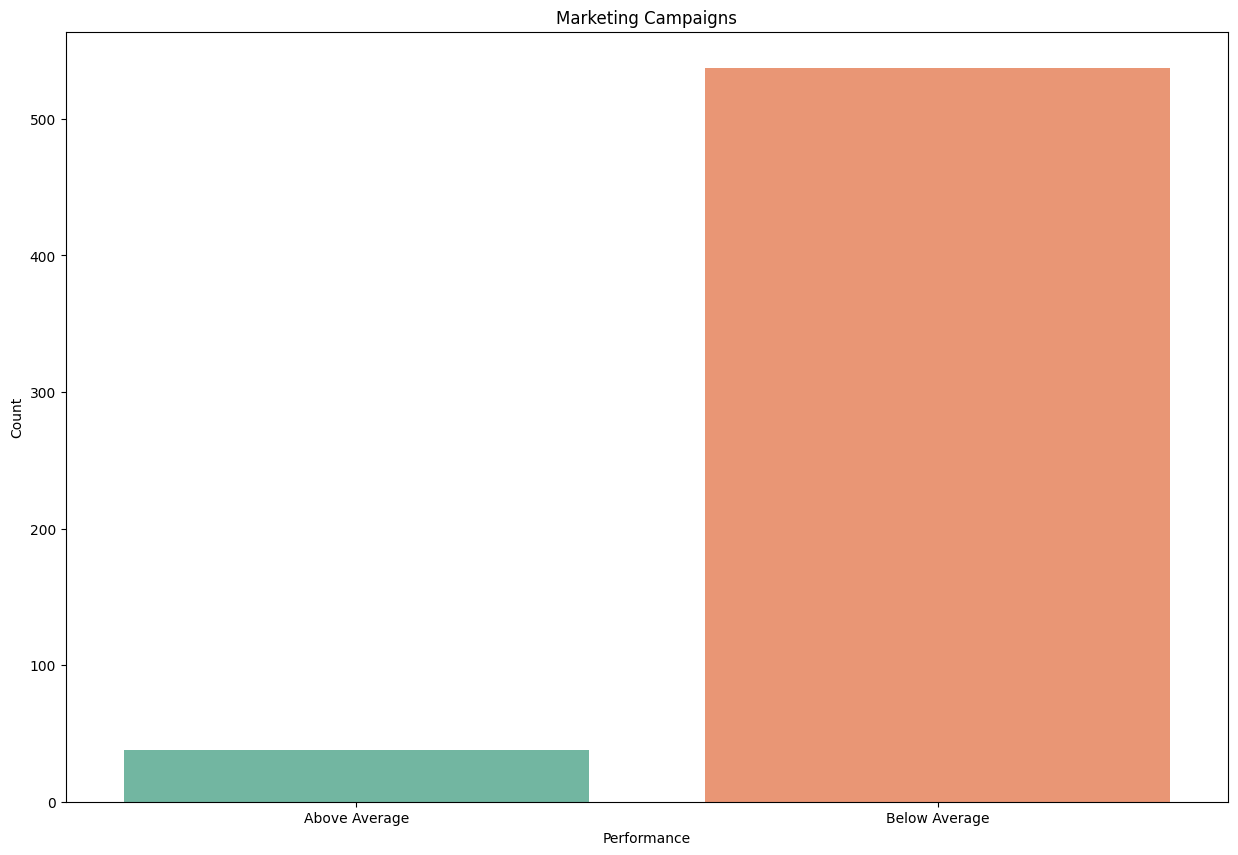

In [30]:
#Analyze whether streamers with high performance metrics receive more brand collaborations and
# marketing campaigns.
#streamers with above-average performance
above_avg_streamers = data[
    (data['Subscribers'] > avg_metrics['Subscribers']) &
    (data['Visits'] > avg_metrics['Visits']) &
    (data['Likes'] > avg_metrics['Likes']) &
    (data['Comments'] > avg_metrics['Comments'])
]
#streamers with below-average performance
below_avg_streamers = data[
    (data['Subscribers'] < avg_metrics['Subscribers']) &
    (data['Visits'] < avg_metrics['Visits']) &
    (data['Likes'] < avg_metrics['Likes']) &
    (data['Comments'] < avg_metrics['Comments'])
]
#streamers with above-average performance
above_avg_streamers['Marketing'] = 'Above Average'
#streamers with below-average performance
below_avg_streamers['Marketing'] = 'Below Average'
#combine both dataframes
marketing_data = pd.concat([above_avg_streamers, below_avg_streamers])
#visualize the marketing data
plt.figure(figsize=(15, 10))
sns.countplot(x='Marketing', data=marketing_data, palette='Set2')
plt.title('Marketing Campaigns')
plt.xlabel('Performance') 
plt.ylabel('Count')
plt.show()